# Mental Attention States Classification Using EEG Data

### Pattern Recognition - Mid-term project - Group 3

| **Full name**          | **Student ID** |
|------------------------|----------------|
| Lê Hồng Cát            |  21110249      |       
| Trương Minh Hoàng      |  22280034      |
| Đặng Minh Phúc         |  22280064      |
| Trần Nguyễn Trung Tuấn |  22280101      |


# Outline
- [ 1 - Objective ](#1)
- [ 2 - Data Preprocessing ](#2)
- [ 3 - Feature Engineering ](#3)
- [ 4 - Model Development ](#4)
- [ 5 - Analysis and Visualization ](#5)
- [ 6 - Report ](#6)
- [ 7 - Self-Assessment ](#7)

<a name="1"></a>
## 1. Objective

 Classify mental attention states (focused, unfocused, drowsy) based on EEG signals using
 machine learning techniques.

__Dataset Details:__
 - Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/data
 - Data was acquired from EMOTIV EEG devices during 34 experiments.
 - EEG data is in channels 4 to 17 of the provided Matlab files.
 - Sampling frequency: 128 Hz.

<a name="2"></a>
## 2. Data Preprocessing

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

# Load the .mat file
mat_data = loadmat('EEG Data/eeg_record1.mat')

# Inspect the content of the .mat file
print(mat_data.keys())  # Lists the variables stored in the .mat file

dict_keys(['__header__', '__version__', '__globals__', 'o'])


In [2]:
o = mat_data['o']
o.dtype

dtype([('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('timestamp', 'O'), ('data', 'O'), ('trials', 'O')])

In [3]:
columns = [
    'ED_AF3', 'ED_F7', 'ED_F3', 'ED_FC5', 'ED_T7', 'ED_P7', 'ED_O1',
    'ED_O2',  'ED_P8', 'ED_T8', 'ED_FC6', 'ED_F4', 'ED_F8', 'ED_AF4',    
]

data = o[0][0]['data']

# The EEG data is in the channels 4:17 (columns index 3:17)
data = pd.DataFrame(data[:, 3:17], columns=columns)

In [4]:
data

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615,4563.589744
1,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872,4566.666667
2,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154,4557.948718
3,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974,4552.820513
4,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974,4546.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308863,4436.923077,4564.615385,5625.128205,3828.717949,4024.615385,4800.512821,4904.615385,4629.230769,4749.230769,4316.923077,4144.615385,4280.512821,4335.384615,4713.333333
308864,4443.076923,4555.384615,5617.948718,3830.769231,4024.102564,4798.461538,4903.589744,4629.743590,4740.512821,4319.487179,4143.589744,4283.589744,4335.897436,4704.615385
308865,4441.538462,4554.871795,5613.846154,3828.717949,4026.666667,4795.897436,4903.076923,4627.692308,4731.794872,4320.000000,4143.076923,4285.128205,4334.871795,4701.025641
308866,4441.538462,4556.410256,5610.256410,3825.641026,4027.179487,4787.692308,4897.435897,4621.538462,4733.333333,4318.461538,4143.589744,4283.589744,4334.358974,4696.923077


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308868 entries, 0 to 308867
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ED_AF3  308868 non-null  float64
 1   ED_F7   308868 non-null  float64
 2   ED_F3   308868 non-null  float64
 3   ED_FC5  308868 non-null  float64
 4   ED_T7   308868 non-null  float64
 5   ED_P7   308868 non-null  float64
 6   ED_O1   308868 non-null  float64
 7   ED_O2   308868 non-null  float64
 8   ED_P8   308868 non-null  float64
 9   ED_T8   308868 non-null  float64
 10  ED_FC6  308868 non-null  float64
 11  ED_F4   308868 non-null  float64
 12  ED_F8   308868 non-null  float64
 13  ED_AF4  308868 non-null  float64
dtypes: float64(14)
memory usage: 33.0 MB


### Bandpass Filtering

In [6]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, low, high, fs=128, order=5):
    nyquist = 0.5 * fs
    low = low / nyquist
    high = high / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Lọc tín hiệu từng kênh
data_filtered = data.apply(lambda col: bandpass_filter(col, 0.5, 30, fs=128))

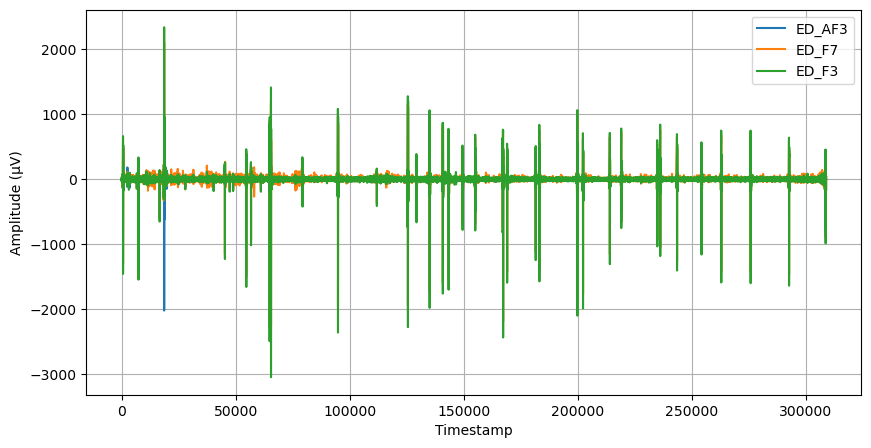

In [7]:
import matplotlib.pyplot as plt

def plot_signal_data(df, channels):
    plt.figure(figsize=(10, 5))
    for channel in channels:
        plt.plot(df.index, df[channel], label=channel)
    
    plt.xlabel('Timestamp')
    plt.ylabel('Amplitude (µV)')
    plt.legend()
    plt.grid()
    plt.show()

channels_to_plot = ["ED_AF3", "ED_F7", "ED_F3"]
plot_signal_data(data_filtered, channels_to_plot)

### Apply ICA to remove dependency between features

In [8]:
from sklearn.decomposition import FastICA

# Áp dụng ICA sau khi lọc tín hiệu
ica = FastICA()
data_ica = ica.fit_transform(data_filtered)  # Kết quả là tín hiệu đã tách độc lập

# Chuyển đổi trở lại DataFrame với các tên kênh ban đầu
data_filtered_ica = pd.DataFrame(data_ica, columns=data_filtered.columns)

/home/tmhoang/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [9]:
data_filtered_ica.head()

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
0,0.000428,0.000226,-0.000448,-0.000057,0.000036,0.000530,0.000234,0.001125,0.000486,-0.000486,-2.225426e-04,-0.000281,-0.000117,-0.000293
1,0.000552,-0.002351,0.000014,-0.000863,0.000074,-0.001285,0.000375,-0.001352,0.000113,0.002647,-1.082683e-04,0.001085,0.002291,-0.002484
2,0.000732,-0.002732,0.000159,-0.001416,-0.000097,-0.001845,0.000426,-0.001330,-0.000122,0.005110,7.149766e-07,0.001437,0.002903,-0.004346
3,0.000562,-0.001915,0.000159,-0.001567,-0.000413,-0.001407,0.000328,0.000110,-0.000355,0.006519,1.525882e-04,0.001000,0.002121,-0.005478
4,-0.000153,-0.001961,0.000425,-0.001426,-0.000664,-0.001014,0.000095,-0.000110,-0.000726,0.007026,4.530533e-04,0.000596,0.001524,-0.005821


Original Signal


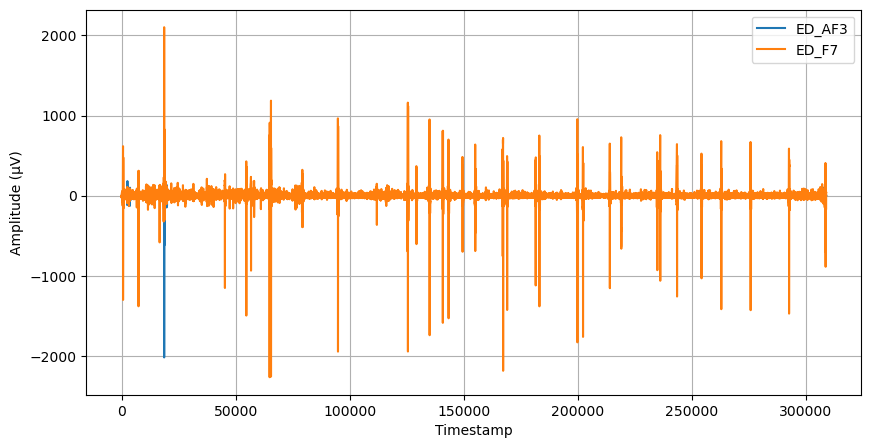

After ICA


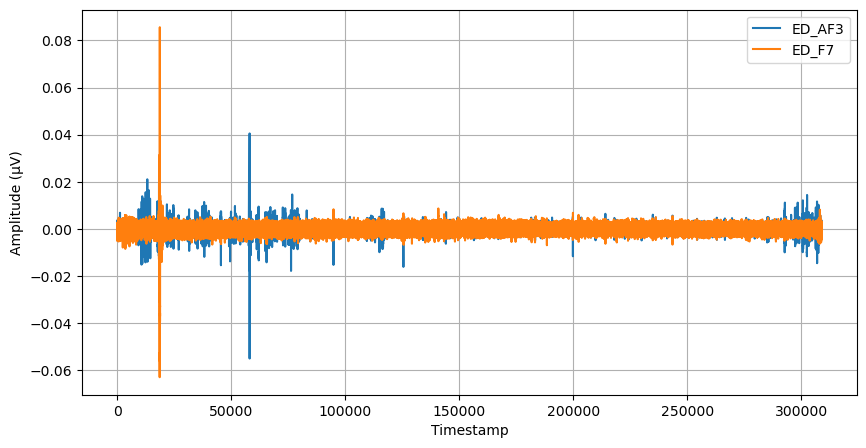

In [10]:
channels_to_plot = ["ED_AF3", "ED_F7"]

print("Original Signal")
plot_signal_data(data_filtered, channels_to_plot)

print("After ICA")
plot_signal_data(data_filtered_ica, channels_to_plot)

### Split data into 3 attention states

In [11]:
focused_df = data_filtered_ica[:10*128*60]
unfocused_df = data_filtered_ica[10*128*60:20*128*60]
drownsy_df = data_filtered_ica[20*128*60:]
print(f"focused_df shape:\t{focused_df.shape}")
print(f"unfocused_df shape:\t{unfocused_df.shape}")
print(f"drownsy_df shape:\t{drownsy_df.shape}")

focused_df shape:	(76800, 14)
unfocused_df shape:	(76800, 14)
drownsy_df shape:	(155268, 14)


<a name="3"></a>
## 3. Feature Engineering

### Short-time Fourier transform

In [16]:
from scipy.signal import stft
import numpy as np

def compute_stft(data, fs=128, window='blackman', nperseg=256, noverlap=128):
    f, t, Zxx = stft(data, fs, window=window, nperseg=nperseg, noverlap=noverlap)
    return f, t, np.abs(Zxx)**2  # Spectrogram

spectrograms = {}
for channel in data_filtered.columns:
    f, t, Sxx = compute_stft(drownsy_df[channel])
    spectrograms[channel] = Sxx

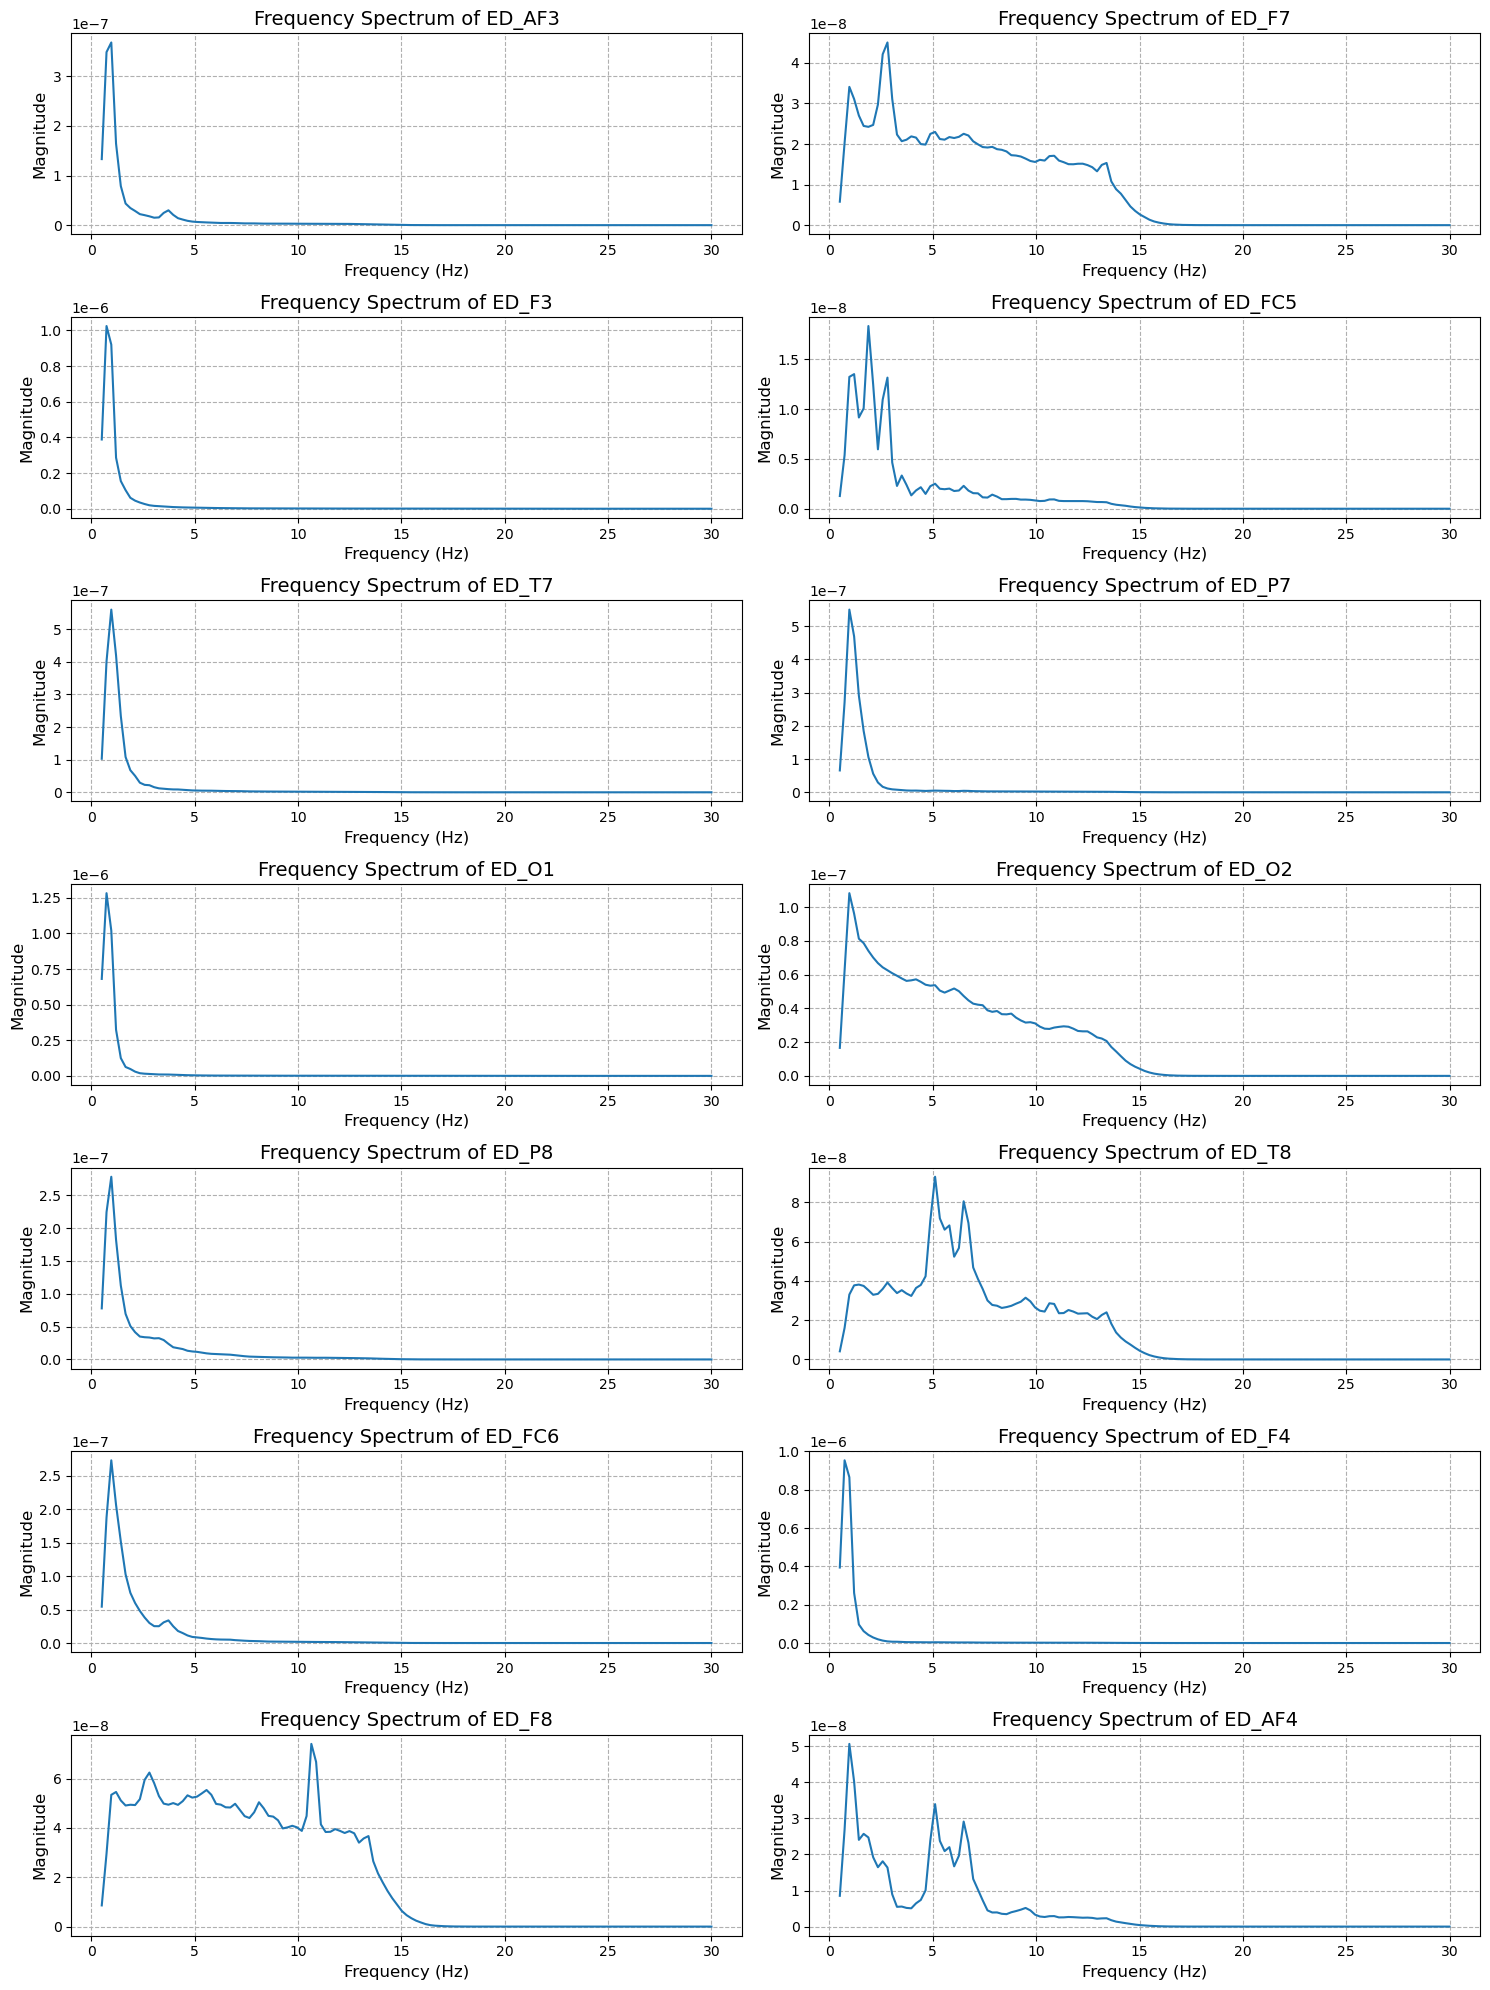

In [17]:
import matplotlib.pyplot as plt
import numpy as np

frequency = np.linspace(0.5, 30, spectrograms['ED_AF3'].shape[0])  # Ví dụ với dải tần từ 0.5 Hz đến 30 Hz

plt.figure(figsize=(15, 20))
# Vẽ phổ tần số cho từng kênh
for i, (channel, Sxx) in enumerate(spectrograms.items()):
    # Tính giá trị magnitude trung bình theo thời gian
    magnitude = np.mean(Sxx, axis=1)
    
    # Tạo biểu đồ
    plt.subplot(7, 2, i + 1)
    plt.plot(frequency, magnitude)
    plt.title(f'Frequency Spectrum of {channel}', fontsize=14)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.grid(linestyle='--')

plt.tight_layout()
plt.show()

### Extract Band Power

In [14]:
def compute_band_power(Sxx, f, bands):
    band_power = {}
    for band_name, (low, high) in bands.items():
        idx_band = np.where((f >= low) & (f <= high))[0]
        band_power[band_name] = np.mean(Sxx[idx_band], axis=0)
    return band_power

bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30)
}

features = {}
for channel, Sxx in spectrograms.items():
    features[channel] = compute_band_power(Sxx, f, bands)

In [16]:
import pandas as pd
import numpy as np

# Tính mean từ dict 'features' và chuyển thành DataFrame
df = pd.DataFrame([
    {
        **{band: np.std(values) for band, values in band_values.items()},
        "channel": channel,
        "state": "drownsy"
    }
    for channel, band_values in features.items()
])

df

,delta,theta,alpha,beta,channel,state
0,1.580012e-06,4.397759e-08,4.346349e-09,2.229954e-09,ED_AF3,drownsy
1,4.403793e-07,2.406281e-08,6.338198e-09,1.155739e-09,ED_F7,drownsy
2,5.039011e-07,6.708028e-08,6.832838e-08,1.527557e-08,ED_F3,drownsy
3,3.181921e-08,1.608332e-08,1.027238e-08,5.627644e-09,ED_FC5,drownsy
4,3.486646e-08,2.644913e-08,2.365102e-08,1.148097e-08,ED_T7,drownsy
5,8.338995e-08,3.540145e-08,2.729530e-08,1.110263e-08,ED_P7,drownsy
6,3.254087e-06,8.049741e-08,3.203762e-09,1.671566e-09,ED_O1,drownsy
7,3.494918e-06,2.813579e-08,7.250606e-09,1.778030e-09,ED_O2,drownsy
8,2.413138e-07,3.138652e-08,4.806910e-09,6.623056e-10,ED_P8,drownsy
9,5.877034e-08,2.527548e-08,3.161074e-08,9.150790e-09,ED_T8,drownsy


# Old

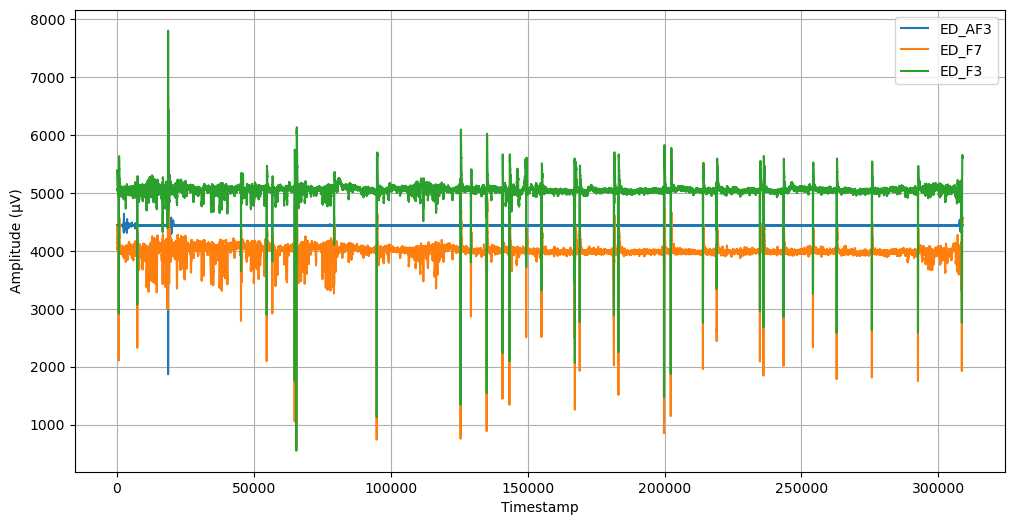

In [6]:
import matplotlib.pyplot as plt

def plot_signal_data(df, channels):
    plt.figure(figsize=(12, 6))
    for channel in channels:
        plt.plot(df.index, df[channel], label=channel)
    
    plt.xlabel('Timestamp')
    plt.ylabel('Amplitude (µV)')
    plt.legend()
    plt.grid()
    plt.show()

channels_to_plot = ["ED_AF3", "ED_F7", "ED_F3"]
plot_signal_data(eeg_df, channels_to_plot)

We need to remove dependency between features so that the signal in different channels will not be mixed, ICA is a good choice to do this task.

In [7]:
from sklearn.decomposition import FastICA

ica = FastICA()
after_ica = ica.fit_transform(eeg_df)  # Estimated sources

/home/tmhoang/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [8]:
after_ica.shape

(308868, 14)

In [9]:
channel_columns = [
    'ED_AF3', 'ED_F7', 'ED_F3', 'ED_FC5', 'ED_T7', 'ED_P7', 'ED_O1',
    'ED_O2',  'ED_P8', 'ED_T8', 'ED_FC6', 'ED_F4', 'ED_F8', 'ED_AF4'
]

In [10]:
df = pd.DataFrame(after_ica, columns=channel_columns)
df

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
0,-0.001052,0.003129,-0.002492,0.000106,-0.004731,0.000876,0.000485,-0.000728,0.006256,0.002918,-0.003755,-0.000022,0.000490,0.001977
1,-0.001160,0.003154,-0.001005,-0.000398,-0.002233,0.001199,0.000403,-0.000254,0.008184,0.000820,-0.002664,-0.000328,-0.000848,-0.000065
2,-0.001296,0.003175,-0.002204,-0.000411,-0.002939,0.000929,0.000422,0.000297,0.007745,-0.001504,0.001780,-0.000316,-0.000598,0.000115
3,-0.001271,0.003156,-0.001835,-0.000234,-0.004580,0.000876,0.000522,0.000344,0.007638,-0.002126,0.002790,-0.000332,-0.000574,0.000764
4,-0.001226,0.002932,-0.002855,-0.000147,-0.003444,0.001026,0.000297,0.000242,0.007521,-0.002726,0.000396,-0.000423,-0.000603,-0.000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308863,-0.001792,-0.000183,-0.000608,0.000259,-0.003664,-0.001896,0.000852,0.000064,0.009661,0.000010,0.002325,-0.000361,0.000056,-0.001558
308864,-0.001426,-0.000217,0.000935,0.000522,-0.000876,-0.001955,0.000797,-0.000479,0.009458,0.000428,0.000048,-0.000743,0.000151,0.000662
308865,-0.001496,-0.000286,0.001359,0.000312,0.000093,-0.001691,0.000666,-0.000311,0.009705,-0.000120,-0.001617,-0.000984,-0.000118,-0.001065
308866,-0.001997,-0.000134,0.000330,0.000041,0.002069,-0.001811,0.000896,-0.000156,0.009834,-0.000142,-0.000191,-0.000865,-0.000264,-0.001764


In [11]:
df.describe()

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
count,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05,3.088680e+05
mean,-3.879030e-17,3.614548e-17,-2.309352e-17,1.327948e-17,2.558271e-16,4.663060e-17,-2.731237e-17,1.674887e-16,2.472391e-16,-1.911284e-16,1.872162e-16,-2.010183e-17,-1.759499e-16,-6.607191e-16
std,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03,1.799344e-03
min,-1.902290e-02,-2.310167e-02,-4.323459e-02,-1.126535e-02,-3.764679e-02,-6.939428e-02,-6.587761e-02,-5.136334e-02,-2.452019e-02,-1.481861e-01,-2.345831e-02,-9.856315e-03,-6.375818e-02,-1.443270e-01
25%,-5.695154e-04,-6.606121e-04,-1.008594e-03,-7.293444e-04,-1.184856e-03,-5.190629e-04,-7.047690e-04,-1.886098e-04,-5.906729e-04,-4.910225e-04,-9.880221e-04,-6.276652e-04,-5.527121e-05,-6.257785e-04
50%,-5.527232e-05,7.527509e-05,-3.381754e-05,-5.238500e-05,-1.269992e-05,1.334396e-06,2.700294e-05,-9.776055e-06,-1.161646e-04,2.357753e-07,1.067206e-04,-1.693795e-04,1.195174e-04,-1.945737e-05
75%,4.464743e-04,7.507527e-04,9.368117e-04,5.838976e-04,1.177736e-03,5.474285e-04,7.644131e-04,1.737778e-04,4.088246e-04,4.922530e-04,1.147311e-03,2.369569e-04,3.123460e-04,6.122779e-04
max,2.483483e-02,2.847055e-02,8.356822e-02,2.155500e-02,1.641061e-02,1.175896e-02,1.212148e-02,4.595082e-01,2.246268e-02,9.245033e-02,4.057962e-02,1.832365e-02,2.444451e-02,8.304044e-02


Original Signal


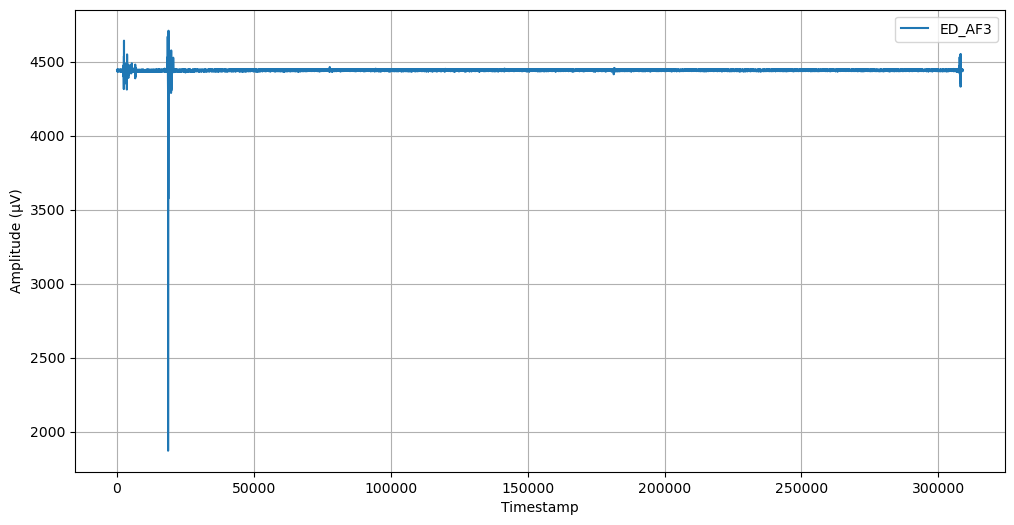

After ICA


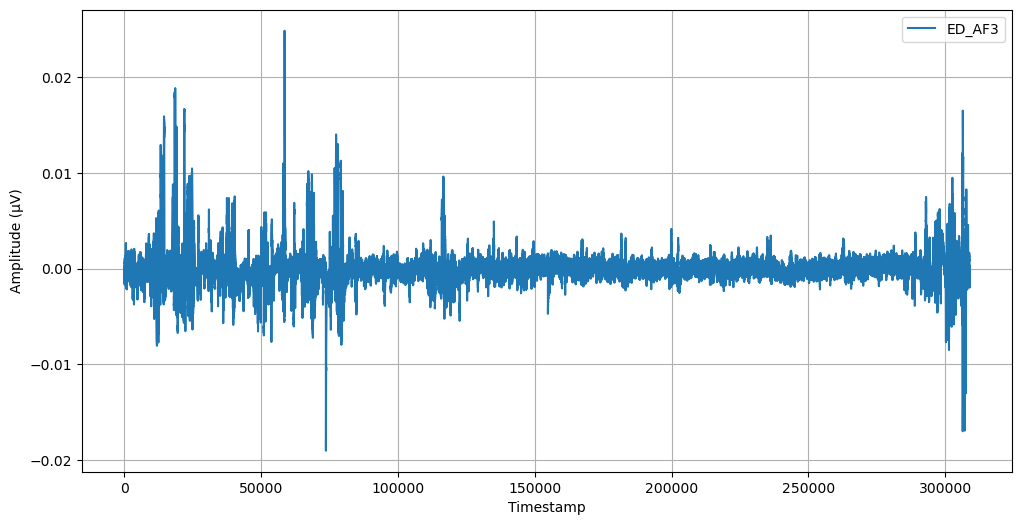

In [12]:
channels_to_plot = ['ED_AF3']

print("Original Signal")
plot_signal_data(eeg_df, channels_to_plot)

print("After ICA")
plot_signal_data(df, channels_to_plot)

After applying ICA to remove dependency, now we need to add the attention states (the target feature) to our dataframe base on experiment time (our index):

- __Focused:__ 0 to 10 min
- __Unfocused:__ 10 to 20min
- __Drownsy:__ 20 to end of experiments

In [18]:
df.iloc[:10*128*60]

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
0,-0.001052,0.003129,-0.002492,0.000106,-0.004731,0.000876,0.000485,-0.000728,0.006256,0.002918,-0.003755,-0.000022,0.000490,0.001977
1,-0.001160,0.003154,-0.001005,-0.000398,-0.002233,0.001199,0.000403,-0.000254,0.008184,0.000820,-0.002664,-0.000328,-0.000848,-0.000065
2,-0.001296,0.003175,-0.002204,-0.000411,-0.002939,0.000929,0.000422,0.000297,0.007745,-0.001504,0.001780,-0.000316,-0.000598,0.000115
3,-0.001271,0.003156,-0.001835,-0.000234,-0.004580,0.000876,0.000522,0.000344,0.007638,-0.002126,0.002790,-0.000332,-0.000574,0.000764
4,-0.001226,0.002932,-0.002855,-0.000147,-0.003444,0.001026,0.000297,0.000242,0.007521,-0.002726,0.000396,-0.000423,-0.000603,-0.000302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76795,0.003832,0.000031,-0.000525,-0.001190,0.000522,0.000061,0.000401,-0.000013,-0.000214,0.000002,0.001590,0.013694,-0.000043,0.000307
76796,0.004068,0.000112,0.000104,-0.001480,0.004193,0.000125,0.000478,-0.000010,0.000237,0.000455,-0.000129,0.013635,-0.000323,0.001073
76797,0.004182,0.000142,-0.000266,-0.001390,0.000779,0.000124,0.000236,0.000580,-0.000537,0.000017,-0.001525,0.013748,0.000085,-0.000004
76798,0.004090,0.000148,-0.000392,-0.001208,-0.002558,0.000167,0.000073,0.000383,-0.000676,-0.000128,0.000647,0.013692,0.000073,-0.000776


In [26]:
focused_df = df[:10*128*60]
unfocused_df = df[10*128*60:20*128*60]
drownsy_df = df[20*128*60:]
print(f"focused_df shape:\t{focused_df.shape}")
print(f"unfocused_df shape:\t{unfocused_df.shape}")
print(f"drownsy_df shape:\t{drownsy_df.shape}")

focused_df shape:	(76800, 14)
unfocused_df shape:	(76800, 14)
drownsy_df shape:	(155268, 14)


In [23]:
def get_state(timestamp):
    """
    Function to get attention state:
    - Focused: 0 to 10 min
    - Unfocused: 10 to 20min
    - Drownsy: 20 to end of experiments
    """
    if timestamp <= 10*128*60:
        return 'focused'
    if timestamp <= 20*128*60:
        return 'unfocused'
    return 'drownsy'
state = df.index.map(get_state)

<a name="3"></a>
## 2. Feature Engineering

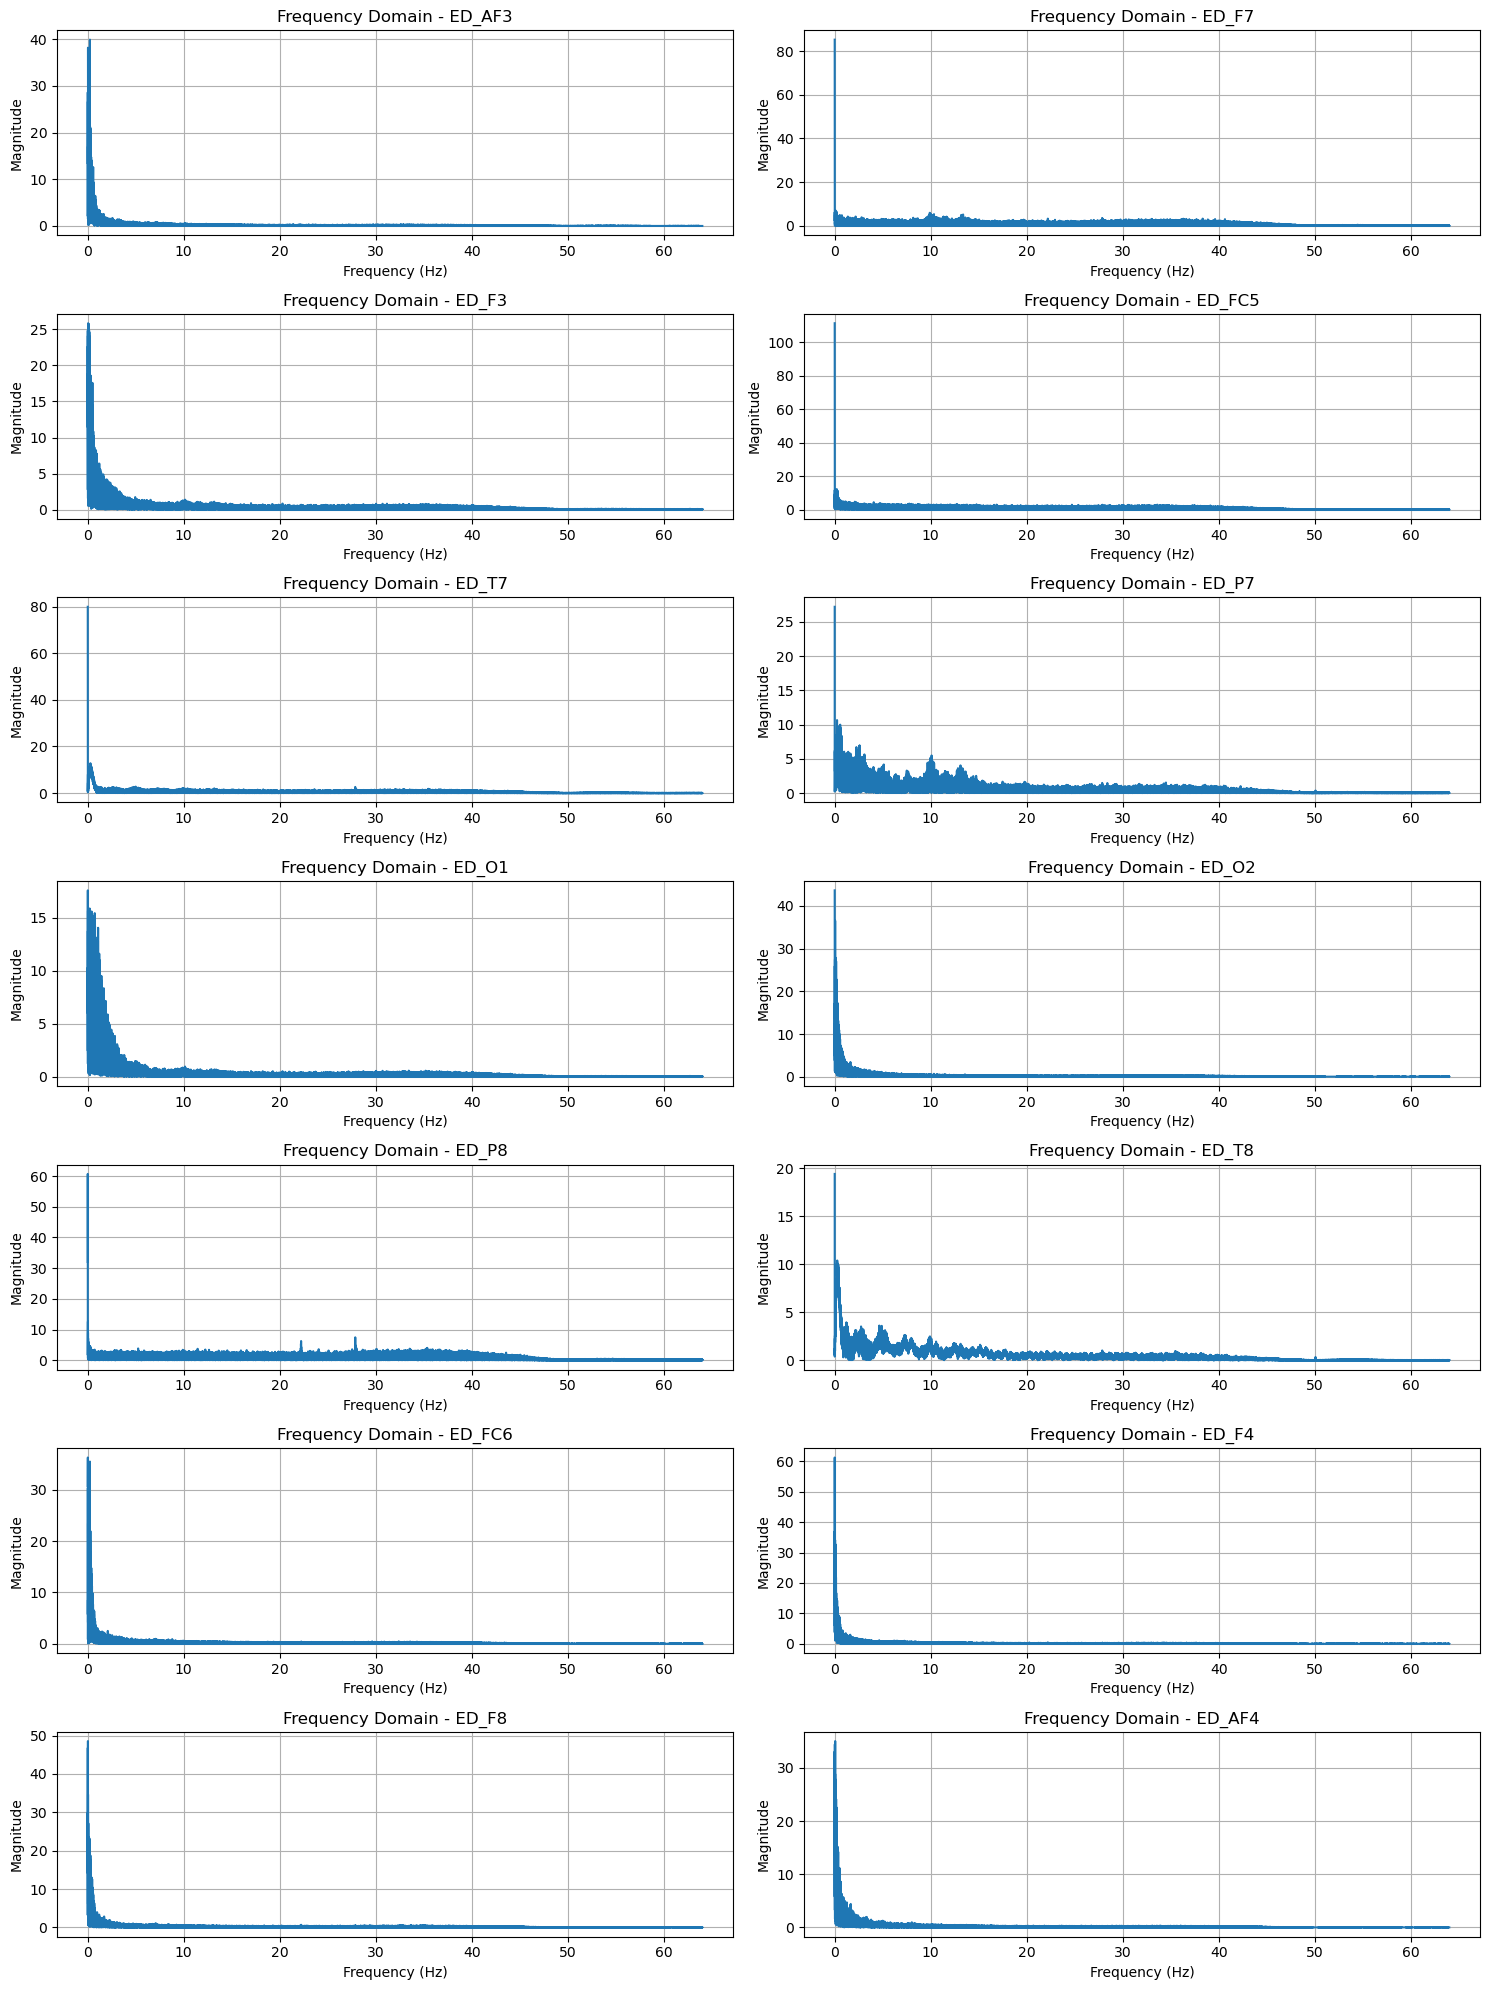

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
fs = 128  # Sampling frequency in Hz
n_samples = len(df)  # Number of samples

# DataFrame để lưu kết quả miền tần số
frequency_data = pd.DataFrame()

# Function to perform FFT
def perform_fft_and_store(data, sampling_frequency):
    n = len(data)  # Number of samples
    frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)  # Frequency axis
    fft_values = np.fft.fft(data)  # Perform FFT
    magnitude = np.abs(fft_values)  # Compute magnitude

    # Keep only positive frequencies
    positive_freq_indices = frequencies > 0
    frequencies = frequencies[positive_freq_indices]
    magnitude = magnitude[positive_freq_indices]

    return frequencies, magnitude

# Visualize FFT and store data
plt.figure(figsize=(15, 20))

for i, channel in enumerate(df.columns):
    # Perform FFT and store data
    frequencies, magnitude = perform_fft_and_store(df[channel], fs)
    
    if i == 0:
        # Chỉ lưu cột state và Frequency (Hz) một lần
        frequency_data["Frequency (Hz)"] = frequencies
    
    # Lưu magnitude cho mỗi kênh
    frequency_data[channel] = magnitude

    # Plot FFT for visualization
    plt.subplot(7, 2, i + 1)
    plt.plot(frequencies, magnitude)
    plt.title(f"Frequency Domain - {channel}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()

plt.tight_layout()
plt.show()

In [16]:
frequency_data

,Frequency (Hz),ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
0,0.000414,13.507293,85.192494,22.534490,111.443021,79.887679,27.191170,6.054895,43.652493,32.018684,19.407065,30.692615,4.262789,14.313308,13.737886
1,0.000829,20.084087,43.722723,12.984546,30.817576,29.557829,9.672902,8.419509,12.939465,60.680811,7.002144,14.761786,30.183017,25.778570,19.036745
2,0.001243,4.365413,47.255890,23.989900,17.998101,20.223820,5.453023,3.968621,27.166909,42.111594,7.259082,18.670246,24.890161,21.780157,25.525436
3,0.001658,7.450033,25.923171,13.029390,7.826659,13.700423,7.373048,8.391339,9.079316,48.618662,2.398949,16.049590,10.922200,22.820754,33.098257
4,0.002072,19.083092,32.331035,17.178183,18.633123,9.005623,0.224689,11.245648,13.642978,22.300387,2.824136,18.131535,13.036886,20.388175,21.955937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154428,63.997928,0.007320,0.109680,0.015957,0.035383,0.018598,0.022979,0.012717,0.003013,0.052216,0.014497,0.001832,0.007812,0.011872,0.006799
154429,63.998342,0.005263,0.214084,0.042575,0.055210,0.017549,0.046467,0.029693,0.008243,0.130605,0.013580,0.009130,0.011226,0.012278,0.004955
154430,63.998757,0.009415,0.074441,0.011983,0.052433,0.025520,0.045881,0.007226,0.005648,0.061527,0.003868,0.007495,0.010048,0.011790,0.008695
154431,63.999171,0.002075,0.155003,0.007852,0.033963,0.016419,0.046650,0.006972,0.004118,0.084076,0.002773,0.005640,0.002797,0.003642,0.003358


Brain waves can be divided into different frequency bands, including
$$
\delta(0.5–4\text{Hz}) \quad \theta(4–8\text{Hz}) \quad \alpha(8–13\text{Hz}) \quad \beta(13–30\text{Hz}) \quad \gamma(30–50\text{Hz})
$$

Above frequency bands range from 0.5Hz to 50Hz, so we can filter our data by keeping only rows having frequency between 0.5Hz and 50Hz

In [17]:
filtered_data = frequency_data[(frequency_data['Frequency (Hz)'] >= 0.5) & (frequency_data['Frequency (Hz)'] <= 50)]

In [18]:
filtered_data

,Frequency (Hz),ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
1206,0.500201,6.520852,1.086347,2.926917,1.527062,7.594614,3.855397,8.248687,3.989667,1.997860,6.655405,8.312731,8.848329,4.645383,5.388674
1207,0.500615,3.668500,2.752160,6.875517,1.215636,7.288093,3.593209,3.729819,6.368341,1.449916,6.931260,5.560714,3.286838,3.538429,6.353800
1208,0.501030,4.471758,2.172641,7.718764,0.650484,7.476876,3.485156,8.427453,3.557408,3.125673,6.709271,4.429244,4.218608,1.968068,3.239069
1209,0.501444,3.329721,2.187677,3.791141,0.881310,6.476397,3.952833,3.005872,6.636017,1.107916,6.421617,7.198826,1.523147,3.246829,4.491058
1210,0.501858,5.529408,2.533657,8.671244,1.627974,8.268135,3.610460,7.908919,1.962197,0.923225,6.859241,8.380914,3.072751,6.712093,3.672098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120646,49.998109,0.005159,0.128920,0.043601,0.034802,0.011412,0.020374,0.035000,0.008615,0.097610,0.014219,0.009059,0.011468,0.006310,0.003268
120647,49.998524,0.005492,0.059187,0.047549,0.064115,0.012641,0.035050,0.034349,0.004216,0.029000,0.023681,0.007095,0.008027,0.014795,0.002815
120648,49.998938,0.006028,0.039576,0.020947,0.015262,0.017694,0.015176,0.013886,0.006452,0.009628,0.014424,0.003081,0.005727,0.003412,0.002003
120649,49.999352,0.008781,0.050100,0.022239,0.075792,0.012011,0.006723,0.015223,0.005445,0.088513,0.007566,0.007719,0.006374,0.001703,0.006519
